In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
df = pd.read_csv("./Assignment-1_Data.csv",delimiter=";")

In [3]:
df_sales = df[df['Quantity'] > 0].copy()


In [4]:

data = df_sales[['BillNo', 'Itemname']]
data

,BillNo,Itemname
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.
...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS
522060,581587,CHILDREN'S APRON DOLLY GIRL
522061,581587,CHILDRENS CUTLERY DOLLY GIRL
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE


In [5]:
data = data.dropna(subset=['BillNo','Itemname'])


In [6]:
data.isnull().sum()


BillNo      0
Itemname    0
dtype: int64

In [7]:
data

,BillNo,Itemname
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.
...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS
522060,581587,CHILDREN'S APRON DOLLY GIRL
522061,581587,CHILDRENS CUTLERY DOLLY GIRL
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE


In [8]:
data['Itemname'] = data['Itemname'].str.strip()
data

,BillNo,Itemname
0,536365,WHITE HANGING HEART T-LIGHT HOLDER
1,536365,WHITE METAL LANTERN
2,536365,CREAM CUPID HEARTS COAT HANGER
3,536365,KNITTED UNION FLAG HOT WATER BOTTLE
4,536365,RED WOOLLY HOTTIE WHITE HEART.
...,...,...
522059,581587,PACK OF 20 SPACEBOY NAPKINS
522060,581587,CHILDREN'S APRON DOLLY GIRL
522061,581587,CHILDRENS CUTLERY DOLLY GIRL
522062,581587,CHILDRENS CUTLERY CIRCUS PARADE


In [9]:
data['Itemname'] = data['Itemname'].str.lower()
data

,BillNo,Itemname
0,536365,white hanging heart t-light holder
1,536365,white metal lantern
2,536365,cream cupid hearts coat hanger
3,536365,knitted union flag hot water bottle
4,536365,red woolly hottie white heart.
...,...,...
522059,581587,pack of 20 spaceboy napkins
522060,581587,children's apron dolly girl
522061,581587,childrens cutlery dolly girl
522062,581587,childrens cutlery circus parade


In [10]:
bad = ['test']
data = data[~data['Itemname'].isin(bad)]


In [11]:
data = data.drop_duplicates(subset=['BillNo','Itemname'])

In [12]:
data.duplicated().sum()


np.int64(0)

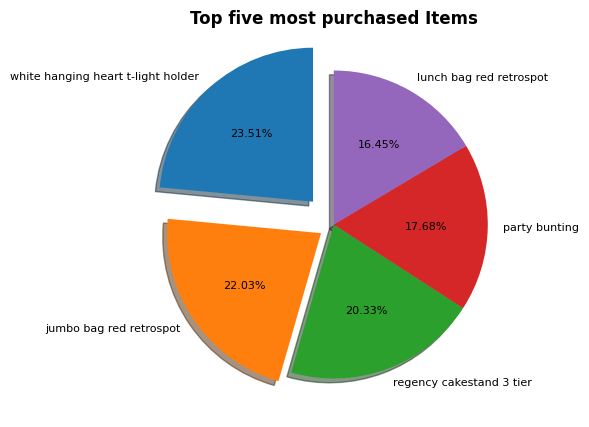

In [13]:
plt.figure(figsize=(5,5))
top_five=data['Itemname'].value_counts().head(5)
plt.pie(top_five, labels=top_five.index,autopct='%1.2f%%',explode=(0.2,0.1,0,0,0),shadow=True,
        startangle=90,textprops={'fontsize': 8})
plt.title('Top five most purchased Items',weight='bold',fontsize=12)
plt.show()

In [14]:
item_counts = data['Itemname'].value_counts()
item_counts.tail()

Itemname
pink cherry lights                1
blue crystal boot phone charm     1
glass cake cover and plate        1
crochet lilac/red bear keyring    1
paper craft , little birdie       1
Name: count, dtype: int64

In [15]:
threshold = 100
valid_items = item_counts[item_counts >= threshold].index

In [16]:
data = data[data['Itemname'].isin(valid_items)]
data.shape

(432040, 2)

In [17]:
transactions = data.groupby('BillNo')['Itemname'].apply(list).tolist()
transactions

[['white hanging heart t-light holder',
  'white metal lantern',
  'cream cupid hearts coat hanger',
  'knitted union flag hot water bottle',
  'red woolly hottie white heart.',
  'set 7 babushka nesting boxes',
  'glass star frosted t-light holder'],
 ['hand warmer union jack'],
 ['assorted colour bird ornament',
  "poppy's playhouse bedroom",
  "poppy's playhouse kitchen",
  'feltcraft princess charlotte doll',
  'ivory knitted mug cosy',
  'box of 6 assorted colour teaspoons',
  'box of vintage jigsaw blocks',
  'box of vintage alphabet blocks',
  'home building block word',
  'love building block word',
  'doormat new england'],
 ['jam making set with jars',
  'red coat rack paris fashion',
  'blue coat rack paris fashion'],
 ['bath building block word'],
 ['alarm clock bakelike pink',
  'alarm clock bakelike red',
  'alarm clock bakelike green',
  'stars gift tape',
  'vintage heads and tails card game',
  'set/2 red retrospot tea towels',
  'round snack boxes set of4 woodland',
 

In [18]:
from mlxtend.preprocessing import TransactionEncoder
TE= TransactionEncoder()
te_matrix=TE.fit(transactions).transform(transactions)
basket=pd.DataFrame(te_matrix,columns=TE.columns_)


In [19]:
basket.shape

(19183, 1531)

In [20]:
from mlxtend.frequent_patterns import apriori, association_rules

frequent_items=apriori(basket,min_support=0.02,use_colnames=True)
rules = association_rules(frequent_items,metric='lift',min_threshold=1)

frequent_items.sort_values(by='support', ascending=False).head()

,support,itemsets
287,0.114789,(white hanging heart t-light holder)
108,0.107595,(jumbo bag red retrospot)
208,0.099255,(regency cakestand 3 tier)
165,0.086326,(party bunting)
133,0.080332,(lunch bag red retrospot)


In [21]:
rules.sort_values(by='lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
177,"(green regency teacup and saucer, roses regenc...",(pink regency teacup and saucer),0.038107,0.038367,0.026847,0.704514,18.362363,1.0,0.025385,3.254414,0.983000,0.540966,0.692725,0.702121
180,(pink regency teacup and saucer),"(green regency teacup and saucer, roses regenc...",0.038367,0.038107,0.026847,0.699728,18.362363,1.0,0.025385,3.203410,0.983266,0.540966,0.687833,0.702121
179,(green regency teacup and saucer),"(pink regency teacup and saucer, roses regency...",0.050826,0.029714,0.026847,0.528205,17.776419,1.0,0.025336,2.056585,0.994281,0.500000,0.513757,0.715857
178,"(pink regency teacup and saucer, roses regency...",(green regency teacup and saucer),0.029714,0.050826,0.026847,0.903509,17.776419,1.0,0.025336,9.836892,0.972647,0.500000,0.898342,0.715857
28,(green regency teacup and saucer),(pink regency teacup and saucer),0.050826,0.038367,0.031538,0.620513,16.172958,1.0,0.029588,2.534032,0.988405,0.547016,0.605372,0.721262
29,(pink regency teacup and saucer),(green regency teacup and saucer),0.038367,0.050826,0.031538,0.822011,16.172958,1.0,0.029588,5.332762,0.975600,0.547016,0.812480,0.721262
176,"(green regency teacup and saucer, pink regency...",(roses regency teacup and saucer),0.031538,0.052807,0.026847,0.851240,16.119774,1.0,0.025181,6.367241,0.968510,0.466908,0.842946,0.679815
181,(roses regency teacup and saucer),"(green regency teacup and saucer, pink regency...",0.052807,0.031538,0.026847,0.508391,16.119774,1.0,0.025181,1.969983,0.990257,0.466908,0.492381,0.679815
27,(gardeners kneeling pad keep calm),(gardeners kneeling pad cup of tea),0.047177,0.039306,0.028358,0.601105,15.293099,1.0,0.026504,2.408389,0.980886,0.487892,0.584785,0.661295
26,(gardeners kneeling pad cup of tea),(gardeners kneeling pad keep calm),0.039306,0.047177,0.028358,0.721485,15.293099,1.0,0.026504,3.421088,0.972849,0.487892,0.707695,0.661295


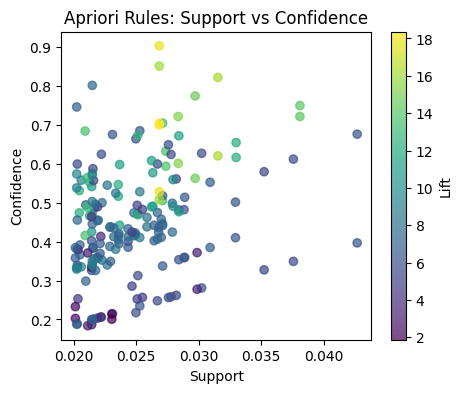

In [22]:
plt.figure(figsize=(5,4))
plt.scatter(rules['support'], rules['confidence'],
            c=rules['lift'], cmap='viridis', alpha=0.7)
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('Apriori Rules: Support vs Confidence')
plt.show()


<Axes: >

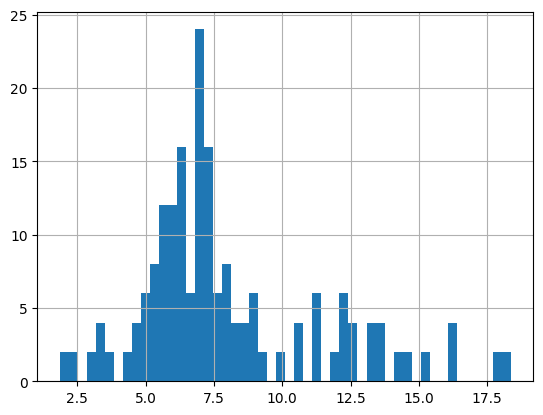

In [23]:
rules['lift'].hist(bins=50)

In [24]:
from mlxtend.frequent_patterns import fpgrowth, association_rules
frequent_fp = fpgrowth(basket, min_support=0.02, use_colnames=True)
rules_fp = association_rules(frequent_fp, metric='lift', min_threshold=1)

In [25]:
rules_fp.sort_values('lift', ascending=False).head(10)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
157,"(green regency teacup and saucer, roses regenc...",(pink regency teacup and saucer),0.038107,0.038367,0.026847,0.704514,18.362363,1.0,0.025385,3.254414,0.983000,0.540966,0.692725,0.702121
160,(pink regency teacup and saucer),"(green regency teacup and saucer, roses regenc...",0.038367,0.038107,0.026847,0.699728,18.362363,1.0,0.025385,3.203410,0.983266,0.540966,0.687833,0.702121
158,"(pink regency teacup and saucer, roses regency...",(green regency teacup and saucer),0.029714,0.050826,0.026847,0.903509,17.776419,1.0,0.025336,9.836892,0.972647,0.500000,0.898342,0.715857
159,(green regency teacup and saucer),"(pink regency teacup and saucer, roses regency...",0.050826,0.029714,0.026847,0.528205,17.776419,1.0,0.025336,2.056585,0.994281,0.500000,0.513757,0.715857
153,(pink regency teacup and saucer),(green regency teacup and saucer),0.038367,0.050826,0.031538,0.822011,16.172958,1.0,0.029588,5.332762,0.975600,0.547016,0.812480,0.721262
152,(green regency teacup and saucer),(pink regency teacup and saucer),0.050826,0.038367,0.031538,0.620513,16.172958,1.0,0.029588,2.534032,0.988405,0.547016,0.605372,0.721262
156,"(green regency teacup and saucer, pink regency...",(roses regency teacup and saucer),0.031538,0.052807,0.026847,0.851240,16.119774,1.0,0.025181,6.367241,0.968510,0.466908,0.842946,0.679815
161,(roses regency teacup and saucer),"(green regency teacup and saucer, pink regency...",0.052807,0.031538,0.026847,0.508391,16.119774,1.0,0.025181,1.969983,0.990257,0.466908,0.492381,0.679815
193,(gardeners kneeling pad keep calm),(gardeners kneeling pad cup of tea),0.047177,0.039306,0.028358,0.601105,15.293099,1.0,0.026504,2.408389,0.980886,0.487892,0.584785,0.661295
192,(gardeners kneeling pad cup of tea),(gardeners kneeling pad keep calm),0.039306,0.047177,0.028358,0.721485,15.293099,1.0,0.026504,3.421088,0.972849,0.487892,0.707695,0.661295


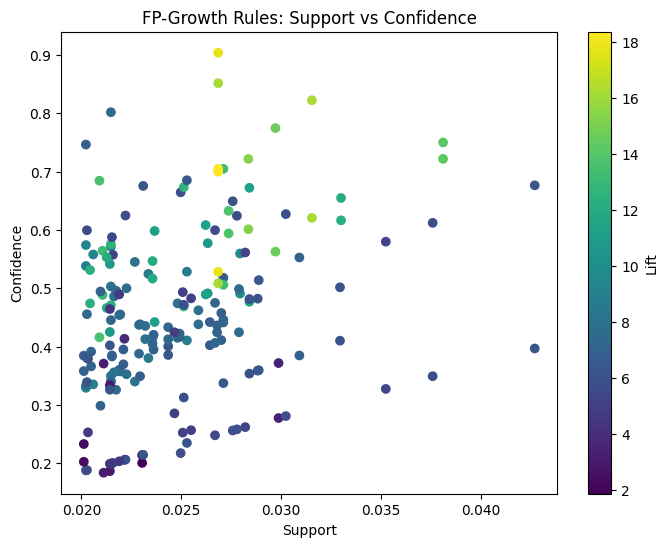

In [26]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(rules_fp['support'], rules_fp['confidence'], c=rules_fp['lift'], cmap='viridis')
plt.colorbar(label='Lift')
plt.xlabel('Support')
plt.ylabel('Confidence')
plt.title('FP-Growth Rules: Support vs Confidence')
plt.show()

<Axes: >

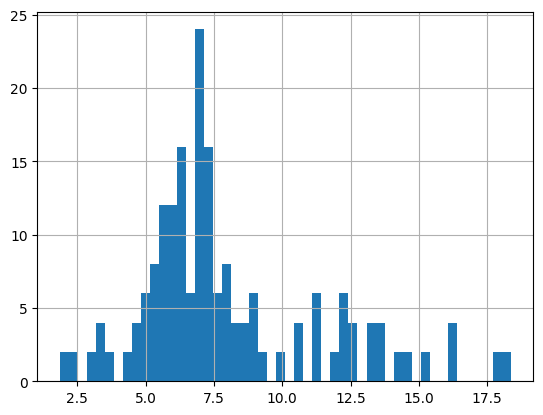

In [27]:
rules_fp['lift'].hist(bins=50)

In [28]:
import time
import pandas as pd
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules
results = {}

min_support = 0.02
min_lift_threshold = 1

# -------- Apriori --------
t0 = time.time()
freq_ap = apriori(basket, min_support=min_support, use_colnames=True)
t1 = time.time()
rules_ap = association_rules(freq_ap, metric='lift', min_threshold=min_lift_threshold)
t2 = time.time()

results['apriori'] = {
    'time_itemsets': t1 - t0,
    'time_rules': t2 - t1,
    'time_total': t2 - t0,
    'n_itemsets': len(freq_ap),
    'n_rules': len(rules_ap),
    'support_stats': freq_ap['support'].describe().to_dict(),
    'rules_support_stats': rules_ap['support'].describe().to_dict(),
    'rules_confidence_stats': rules_ap['confidence'].describe().to_dict(),
    'rules_lift_stats': rules_ap['lift'].describe().to_dict(),
}

# -------- FP-Growth --------
t0 = time.time()
freq_fp = fpgrowth(basket, min_support=min_support, use_colnames=True)
t1 = time.time()
rules_fp = association_rules(freq_fp, metric='lift', min_threshold=min_lift_threshold)
t2 = time.time()

results['fpgrowth'] = {
    'time_itemsets': t1 - t0,
    'time_rules': t2 - t1,
    'time_total': t2 - t0,
    'n_itemsets': len(freq_fp),
    'n_rules': len(rules_fp),
    'support_stats': freq_fp['support'].describe().to_dict(),
    'rules_support_stats': rules_fp['support'].describe().to_dict(),
    'rules_confidence_stats': rules_fp['confidence'].describe().to_dict(),
    'rules_lift_stats': rules_fp['lift'].describe().to_dict(),
}

import pprint
pprint.pprint(results)


{'apriori': {'n_itemsets': 398,
             'n_rules': 194,
             'rules_confidence_stats': {'25%': 0.35628460017414754,
                                        '50%': 0.4382047780609013,
                                        '75%': 0.5461935521997254,
                                        'count': 194.0,
                                        'max': 0.9035087719298246,
                                        'mean': 0.45139478042875886,
                                        'min': 0.18392370572207084,
                                        'std': 0.14753497053244688},
             'rules_lift_stats': {'25%': 5.993271658300905,
                                  '50%': 7.055501149373982,
                                  '75%': 9.085212176148408,
                                  'count': 194.0,
                                  'max': 18.362362829358236,
                                  'mean': 8.043748274800478,
                                  'min': 1.8655710277478

In [29]:
import time
import pandas as pd
from mlxtend.frequent_patterns import apriori, fpgrowth, association_rules

n_runs = 5
time_results = {'apriori': [], 'fpgrowth': []}

for i in range(n_runs):
    # Apriori
    t0 = time.time()
    freq_ap = apriori(basket, min_support=0.02, use_colnames=True)
    t1 = time.time()
    rules_ap = association_rules(freq_ap, metric='lift', min_threshold=1)
    t2 = time.time()
    time_results['apriori'].append({
        'time_itemsets': t1 - t0,
        'time_rules': t2 - t1,
        'total_time': t2 - t0
    })
    
    # FP-Growth
    t0 = time.time()
    freq_fp = fpgrowth(basket, min_support=0.02, use_colnames=True)
    t1 = time.time()
    rules_fp = association_rules(freq_fp, metric='lift', min_threshold=1)
    t2 = time.time()
    time_results['fpgrowth'].append({
        'time_itemsets': t1 - t0,
        'time_rules': t2 - t1,
        'total_time': t2 - t0
    })

# تحويل النتائج ل DataFrame
apriori_times = pd.DataFrame(time_results['apriori'])
fpgrowth_times = pd.DataFrame(time_results['fpgrowth'])

# حساب المتوسط
print("Average times over 5 runs:")
print("Apriori:\n", apriori_times.mean())
print("FP-Growth:\n", fpgrowth_times.mean())


Average times over 5 runs:
Apriori:
 time_itemsets    10.459356
time_rules        0.006982
total_time       10.466338
dtype: float64
FP-Growth:
 time_itemsets    13.238407
time_rules        0.006478
total_time       13.244884
dtype: float64


Comparison Table (Average Times over 5 runs):


,Step,Apriori (s),FP-Growth (s)
0,Itemsets,10.459356,13.238407
1,Rules,0.006982,0.006478
2,Total,10.466338,13.244884


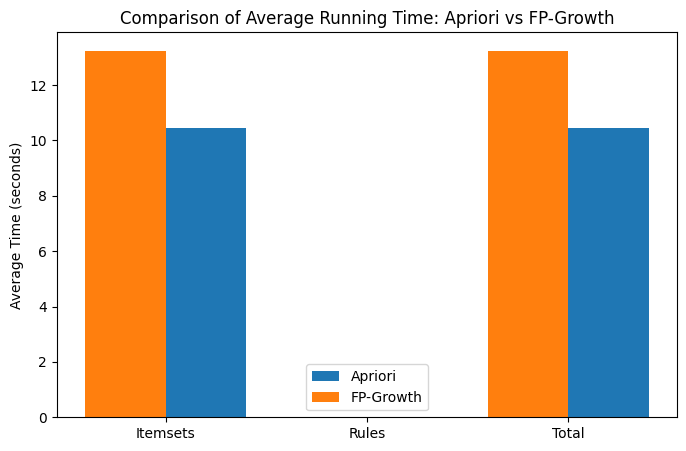

In [30]:
avg_apriori = apriori_times.mean()
avg_fp = fpgrowth_times.mean()

comparison_df = pd.DataFrame({
    'Step': ['Itemsets', 'Rules', 'Total'],
    'Apriori (s)': [avg_apriori['time_itemsets'], avg_apriori['time_rules'], avg_apriori['total_time']],
    'FP-Growth (s)': [avg_fp['time_itemsets'], avg_fp['time_rules'], avg_fp['total_time']]
})

print("Comparison Table (Average Times over 5 runs):")
display(comparison_df)

plt.figure(figsize=(8,5))
x = comparison_df['Step']
plt.bar(x, comparison_df['Apriori (s)'], width=0.4, label='Apriori', align='edge')
plt.bar(x, comparison_df['FP-Growth (s)'], width=-0.4, label='FP-Growth', align='edge')
plt.ylabel('Average Time (seconds)')
plt.title('Comparison of Average Running Time: Apriori vs FP-Growth')
plt.legend()
plt.show()


# Finally, we suggest using the Apriori  model